In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from astropy.coordinates import SkyCoord, Galactocentric
from astropy import units as u
from astropy.time import Time
from astropy import constants as const
import astropy.coordinates as coord
from astropy.table import Table
import datetime

import matplotlib
matplotlib.rcParams.update({'font.size':12})
matplotlib.rcParams.update({'font.family':'serif'})

from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

In [14]:
# config info
import sys
print("Python version:", sys.version)
print("Astropy version:", astropy.__version__)
print("Matplotlib version:", matplotlib.__version__)

Python version: 3.9.13 (v3.9.13:6de2ca5339, May 17 2022, 11:37:23) 
[Clang 13.0.0 (clang-1300.0.29.30)]
Astropy version: 6.0.1
Matplotlib version: 3.9.4


In [15]:
#sources from Gaia Catalog of Nearby Stars, https://ui.adsabs.harvard.edu/abs/2021A%26A...649A...6G/abstract
gcns = pd.read_csv("table1c.csv", header=None)

In [16]:
#metadata for GCNS
metadata = pd.read_csv("metadata.csv")

In [17]:
#adding column names
labels = metadata['Label']
gcns.columns = [labels]

In [18]:
gcns

Label,GaiaEDR3,RAdeg,e_RAdeg,DEdeg,e_DEdeg,Plx,e_Plx,pmRA,e_pmRA,pmDE,...,e_Ksmag,WISE,W1mag,e_W1mag,W2mag,e_W2mag,W3mag,e_W3mag,W4mag,e_W4mag
0,2334666126716440064,0.002565,0.03305,-26.365350,0.02500,14.697,0.03698,23.497,0.03680,-62.339,...,0.026,J000000.61-262155.2,11.799,0.012,11.606,0.009,11.100,0.128,9.074,NaN
1,2341871673090078592,0.005121,0.42837,-19.498841,0.34734,26.798,0.50664,179.805,0.57186,-1.041,...,0.018,J000001.23-192955.7,6.868,0.021,6.800,0.009,6.722,0.016,6.704,0.077
2,530861741656374272,0.005637,0.00951,70.887364,0.00858,10.282,0.01075,-52.864,0.01210,17.787,...,0.022,J000001.37+705314.4,8.965,0.013,9.024,0.009,8.937,0.027,8.649,0.333
3,2745400068346761216,0.009336,0.03793,6.511017,0.03139,16.260,0.05893,117.495,0.06235,9.521,...,0.020,J000002.22+063039.7,11.866,0.013,11.660,0.009,11.630,0.218,8.881,NaN
4,2855176271335676800,0.013536,0.02864,29.277896,0.01968,10.295,0.04369,51.287,0.05345,46.282,...,0.018,J000003.24+291640.4,11.907,0.012,11.743,0.008,11.589,0.218,9.077,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331307,2766925825958528512,359.993523,0.03391,12.376062,0.02638,22.624,0.04461,-73.354,0.05561,-84.683,...,0.022,J235958.43+122233.9,11.516,0.012,11.288,0.008,11.161,0.164,8.734,0.505
331308,2773791481503524992,359.994028,0.22628,18.053030,0.14174,14.321,0.27067,261.914,0.33586,-99.384,...,0.035,J235958.54+180310.9,13.521,0.015,13.331,0.012,12.667,NaN,9.057,NaN
331309,6521388186590534272,359.994771,0.01233,-53.182288,0.01463,18.105,0.02083,57.761,0.01537,96.078,...,0.025,J235958.73-531056.2,10.857,0.012,10.679,0.008,10.482,0.068,8.853,NaN
331310,2011682661920690304,359.995813,0.46508,60.918306,0.34315,9.094,0.53559,-24.265,0.58406,-25.545,...,0.029,J235959.00+605505.8,12.739,0.014,12.590,0.009,NaN,NaN,NaN,NaN


In [19]:
# SN 2023ixf Properties
t0 = Time({'year': 2023, 'month': 5, 'day': 19, 'hour': 17, 'minute': 27}, format='ymdhms') #time first detection, https://www.wis-tns.org/object/2023ixf/discovery-cert

c0_radec = SkyCoord.from_name('SN2023ixf')

d0 = 6.95 * u.Mpc


c0 = SkyCoord(ra=c0_radec.ra, dec=c0_radec.dec, distance=d0)

In [20]:
t0.mjd

60083.72708333333

In [21]:
#changing values to string
ra_gcns=gcns['RAdeg'].astype(str).values.tolist()
dec_gcns= gcns['DEdeg'].astype(str).values.tolist()

In [22]:
# Coordinates for gcns objects
coord = SkyCoord(ra = ra_gcns,
                dec = dec_gcns,
                distance= gcns['Dist50'], frame='icrs', unit=('deg','deg',u.kpc))

In [23]:
#Observation midtime for 2023
time_s23 = Time({'year':2023, 'month':5, 'day':30}, format='ymdhms')
time_e23 = Time({'year':2023, 'month':5, 'day':31}, format='ymdhms')
time23 = (time_e23-time_s23)/2+time_s23

print(time23)
    
dt23 = time23-t0 #ellapsed time since SN and midtime observation of targets


# Observation midtime for 2024
time_s24 = Time({'year':2024, 'month':4, 'day':25}, format='ymdhms')
time_e24 = Time({'year':2024, 'month':5, 'day':31}, format='ymdhms')
time24 = (time_e24-time_s24)/2+time_s24

print(time24)
    
dt24 = time24-t0 #ellapsed time since SN and midtime observation of targets

(2023, 5, 30, 12, 0, 0.)
(2024, 5, 13, 0, 0, 0.)


In [24]:
#ellipsoid parameters
c = d0.to('lyr') / 2 # dist to foci from ellipse center
a23 = (((dt23.to('s') * const.c).to('lyr') / 2) + c) # the semi-major axis of ellipse in 2023
a24 = (((dt24.to('s') * const.c).to('lyr') / 2) + c) # the semi-major axis of ellipse in 2024
d1 = (gcns['Dist50'].values* u.kpc) # dist to stars
d2 = coord.separation_3d(c0) # dist from stars to SN 

In [25]:
# is it within some tolerance of being ON the ellipse?

tol = 0.1 # in lyr, matching half of the observing period

#2023
ellipsoid_check23 = np.abs((d1.to('lyr').value + d2.to('lyr').value) - (2 * a23.to('lyr').value)) <= tol

#2024
ellipsoid_check24 = np.abs((d1.to('lyr').value + d2.to('lyr').value) - (2 * a24.to('lyr').value)) <= tol

In [26]:
ellipsoid_targets23 = gcns[ellipsoid_check23]
ellipsoid_targets24 = gcns[ellipsoid_check24]

In [27]:
ellipsoid_targets23

Label,GaiaEDR3,RAdeg,e_RAdeg,DEdeg,e_DEdeg,Plx,e_Plx,pmRA,e_pmRA,pmDE,...,e_Ksmag,WISE,W1mag,e_W1mag,W2mag,e_W2mag,W3mag,e_W3mag,W4mag,e_W4mag
186108,1562349333797785984,206.242052,0.01350,55.472636,0.01273,38.307,0.01579,112.683,0.01634,-28.367,...,0.018,J134458.08+552821.5,9.845,0.011,9.637,0.008,9.452,0.034,9.104,0.406
187269,1561409560593799680,207.457475,0.01099,54.589730,0.01172,26.798,0.01358,222.624,0.01398,-132.301,...,0.022,J134949.79+543523.1,10.003,0.013,9.820,0.008,9.675,0.036,8.679,NaN
187507,1560748410506693760,207.730642,0.16025,52.965675,0.16763,23.074,0.19949,-196.644,0.19703,-88.443,...,0.042,J135055.38+525756.6,13.037,0.011,12.799,0.009,12.073,0.256,9.306,NaN
187613,1561515526026874624,207.835000,0.02491,54.961767,0.02506,14.403,0.03120,80.190,0.02998,-14.624,...,NaN,J135120.39+545742.5,16.068,0.022,16.286,0.056,12.514,NaN,9.065,0.409
187705,1561389253988468224,207.920753,0.03109,54.329888,0.03305,14.126,0.03768,-104.167,0.03779,23.208,...,NaN,J135140.97+541947.4,16.576,0.030,16.823,0.103,12.894,NaN,9.355,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193455,1608729723554623488,214.264334,0.07762,54.542620,0.08904,18.666,0.09544,-169.348,0.09228,-55.419,...,0.026,J141703.60+543233.2,6.612,0.037,5.954,0.017,5.283,0.015,5.222,0.032
194477,1608678527544560256,215.332384,0.02473,54.339638,0.02567,27.462,0.02918,-84.111,0.03245,279.498,...,0.025,J142119.78+542022.4,11.377,0.012,11.149,0.008,11.133,0.100,8.776,NaN
194859,1604901876901703168,215.763328,0.04979,51.776005,0.04973,57.802,0.05913,362.720,0.06098,192.974,...,0.023,J142303.16+514633.4,10.758,0.011,10.527,0.008,10.233,0.047,9.232,NaN
195359,1604859408265509632,216.296529,0.02867,51.829622,0.02667,68.812,0.03221,-239.504,0.03376,-403.994,...,0.031,J142511.19+514946.9,7.331,0.019,6.824,0.008,NaN,NaN,NaN,NaN


In [28]:
ellipsoid_targets24

Label,GaiaEDR3,RAdeg,e_RAdeg,DEdeg,e_DEdeg,Plx,e_Plx,pmRA,e_pmRA,pmDE,...,e_Ksmag,WISE,W1mag,e_W1mag,W2mag,e_W2mag,W3mag,e_W3mag,W4mag,e_W4mag
172166,1568219729458240128,191.057829,0.29218,51.758453,0.36010,68.952,0.48642,-387.042,0.35081,-185.278,...,0.016,J124414.03+514531.2,5.736,0.051,5.606,0.035,NaN,NaN,NaN,NaN
175523,1576903019458821248,194.859494,0.01423,56.562524,0.01438,42.806,0.01857,-579.267,0.01798,-82.490,...,0.020,J125926.15+563344.8,8.976,0.030,8.841,0.027,8.238,0.020,8.013,0.187
175855,1576850723937017216,195.183115,0.08681,56.366354,0.10917,39.463,0.11993,140.082,0.10600,-0.059,...,0.020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178595,1566603962760532736,198.242868,0.19198,58.086105,0.20113,32.482,0.24680,190.577,0.23787,-82.124,...,0.073,J131258.28+580509.9,14.047,0.013,14.118,0.013,12.422,NaN,9.212,NaN
179656,1566377291566765056,199.332720,0.01114,57.650621,0.01040,29.667,0.01319,-165.058,0.01458,58.678,...,0.020,J131719.87+573902.2,7.972,0.013,7.889,0.008,7.782,0.017,7.640,0.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201454,1593596389107440128,222.973803,0.01742,51.785251,0.02197,30.740,0.02199,395.341,0.02081,-367.658,...,0.017,J145153.65+514707.1,11.157,0.014,10.893,0.010,10.612,0.077,8.681,NaN
201456,1593596767064562304,222.976661,0.01427,51.784476,0.01777,30.740,0.01800,396.506,0.01704,-370.703,...,0.016,J145154.44+514703.8,9.967,0.045,9.772,0.045,9.267,0.030,8.644,NaN
202942,1614477420588506240,224.564369,0.01349,59.583743,0.01276,38.833,0.01393,-108.240,0.01704,65.035,...,0.018,J145815.45+593501.5,7.108,0.021,6.755,0.008,6.656,0.015,6.536,0.051
203563,1586968533015434624,225.232957,0.02009,45.427733,0.02191,85.412,0.02551,225.065,0.02490,328.520,...,0.018,NaN,NaN,NaN,NaN,NaN,5.199,0.015,5.098,0.028


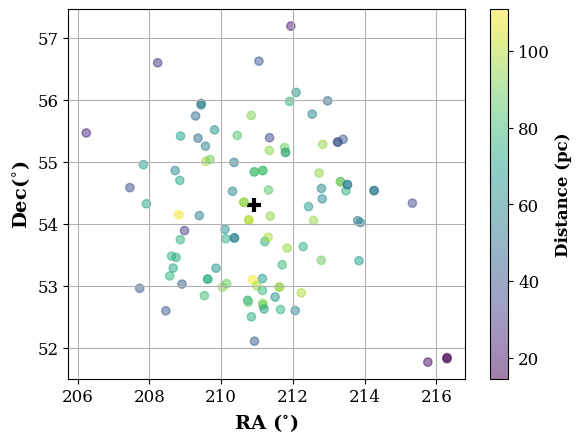

In [29]:
#plot 2023
plt.scatter(c0_radec.ra.value,c0_radec.dec.value, c='black',s=100,marker='+', linewidth=3, label = 'SN 2023ixf')
plt.scatter(ellipsoid_targets23['RAdeg'],ellipsoid_targets23['DEdeg'], c=ellipsoid_targets23['Dist50']*u.kpc.to('pc'),alpha=0.5, rasterized=True)

plt.xlabel('RA ($^{\mathdefault{\circ}}$)', size=14, fontweight='bold')
plt.ylabel('Dec($^{\circ}$)', size=14, fontweight='bold')

# Colorbar with modified tick size
cbar = plt.colorbar()
cbar.set_label(label='Distance (pc)', size=12, weight='bold')

# Adjust tick size
cbar.ax.tick_params(labelsize=12) 

plt.tick_params(axis='both', labelsize=10)

plt.tick_params(axis='both', labelsize=12)

plt.grid(True)

#plt.savefig("Ellipsoid_targets_2023_radec.pdf", format="pdf", bbox_inches='tight') 

plt.show()

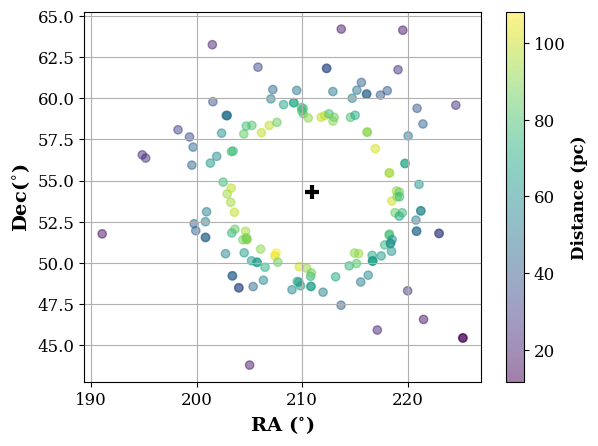

In [30]:
#plot 2024
plt.scatter(c0_radec.ra.value,c0_radec.dec.value, c='black',s=100,marker='+', linewidth=3, label = 'SN 2023ixf')
plt.scatter(ellipsoid_targets24['RAdeg'],ellipsoid_targets24['DEdeg'], c=ellipsoid_targets24['Dist50']*u.kpc.to('pc'),alpha=0.5, rasterized=True)

plt.xlabel('RA ($^{\mathdefault{\circ}}$)', size=14, fontweight='bold')
plt.ylabel('Dec($^{\circ}$)', size=14, fontweight='bold')

# Colorbar with modified tick size
cbar = plt.colorbar()
cbar.set_label(label='Distance (pc)', size=12, weight='bold')

# Adjust tick size
cbar.ax.tick_params(labelsize=12) 

plt.tick_params(axis='both', labelsize=10)

plt.tick_params(axis='both', labelsize=12)

plt.grid(True)

#plt.savefig("Ellipsoid_targets_2024_radec.pdf", format="pdf", bbox_inches='tight') 

plt.show()

Galactocentric plots

In [31]:
# in 2023 has it seen SN  yet?
SNYES23 = d2.to('lyr').value <= (d0.to('lyr') + (dt23.to('s') * const.c)).to('lyr').value
SNNO23 = ~SNYES23

# in 2024 has it seen SN  yet?
SNYES24 = d2.to('lyr').value <= (d0.to('lyr') + (dt24.to('s') * const.c)).to('lyr').value
SNNO24 = ~SNYES24

In [32]:
from astropy.coordinates import Galactocentric
galactic_sn = c0.transform_to(Galactocentric())

In [33]:
x_1 = galactic_sn.x.to('pc').value
y_1 = galactic_sn.y.to('pc').value
z_1 = galactic_sn.z.to('pc').value
y_2 = 0
z_2 = 0
x_2 = 0

In [34]:
dist_2d = np.sqrt((np.abs(y_1)+np.abs(y_2))**2 + (np.abs(z_1)+np.abs(z_2))**2)
dist_2d

6914096.018677677

In [35]:
c_2d = dist_2d / 2 # dist to foci from ellipse center
a_2d_23 = (((dt23.to('year') * const.c).to('pc') / 2).value+ c_2d) # the semi-major axis of ellipse in 2023

a_2d_24 = (((dt24.to('year') * const.c).to('pc') / 2).value+ c_2d) # the semi-major axis of ellipse in 2024

In [36]:
theta = np.linspace(0, 2*np.pi, 1000)
#2023 ellipsoid
x_circ_23 = y_1 + 2*a_2d_23*np.cos(theta)
y_circ_23 = z_1 + 2*a_2d_23*np.sin(theta)

#2024 ellipsoid
x_circ_24 = y_1 + 2*a_2d_24*np.cos(theta)
y_circ_24 = z_1 + 2*a_2d_24*np.sin(theta)

In [37]:
## Compute ellipse parameters
yc = (y_1 + y_2) / 2                       # Center y-value
zc = (z_1 + z_2) / 2                       # Center z-value
xc = (x_1 + x_2) / 2                    # Center x-value
b23 = np.sqrt(a_2d_23**2 - c_2d**2)                  # Semiminor axis in 2023
b24 = np.sqrt(a_2d_24**2 - c_2d**2)                  # Semiminor axis in 2024
phi = np.arctan((z_2 - z_1)/(y_2 - y_1))   # Angle betw major axis and x-axis

In [38]:
# Parametric plot in t
resolution = 10000
t = np.linspace(0, 2*np.pi, resolution)
#2023
y23 = yc + a_2d_23 * np.cos(t) * np.cos(phi) - b23 * np.sin(t) * np.sin(phi)
z23 = zc + a_2d_23 * np.cos(t) * np.sin(phi) + b23 * np.sin(t) * np.cos(phi)
x23 = xc + a_2d_23 * np.cos(t) * np.sin(phi) + b23 * np.sin(t) * np.cos(phi)

#2024
y24 = yc + a_2d_24 * np.cos(t) * np.cos(phi) - b24 * np.sin(t) * np.sin(phi)
z24 = zc + a_2d_24 * np.cos(t) * np.sin(phi) + b24 * np.sin(t) * np.cos(phi)
x24 = xc + a_2d_24 * np.cos(t) * np.sin(phi) + b24 * np.sin(t) * np.cos(phi)

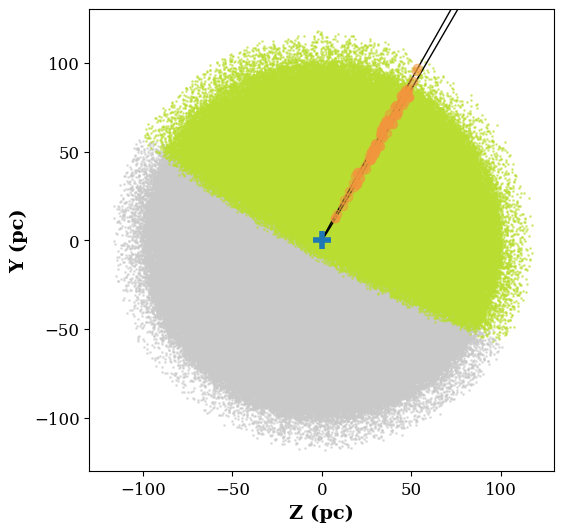

In [39]:
#2023 ellipsoid
fig, ax = plt.subplots(1, figsize=(6,6))
ax.scatter(gcns['ycoord50'][SNNO23], gcns['zcoord50'][SNNO23], c='#C9C9C9', s=1, alpha=.5, rasterized=True, zorder=1)
ax.scatter(gcns['ycoord50'][SNYES23],gcns['zcoord50'][SNYES23], c='#B9DE31', s=1, alpha=.5, rasterized=True, zorder=2)
ax.plot(y23, z23,'-',c='black',linewidth=1, zorder=3)
ax.scatter(ellipsoid_targets23['ycoord50'],ellipsoid_targets23['zcoord50'], c='#F2963D', alpha=0.5, rasterized=True, zorder=4)

ax.scatter([0],[0], c='tab:blue', marker='+', s=180, lw=4, zorder=5)


ax.set_xlim(-130,130)
ax.set_ylim(-130,130)

ax.set_xlabel('Z (pc)',size=14,fontweight='bold')
ax.set_ylabel('Y (pc)',size=14, fontweight='bold')


ax.tick_params(axis='both', labelsize=10)
ax.tick_params(axis='both', labelsize=12)

#fig.savefig("Ellipsoid_targets_2023_galactic.pdf", format="pdf", bbox_inches='tight') 

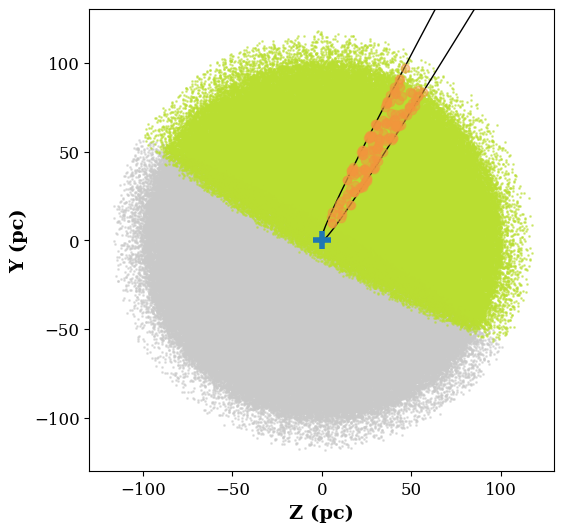

In [40]:
#2024 ellipsoid
fig, ax = plt.subplots(1, figsize=(6,6))
ax.scatter(gcns['ycoord50'][SNNO24], gcns['zcoord50'][SNNO24], c='#C9C9C9', s=1, alpha=.5, rasterized=True, zorder=1)
ax.scatter(gcns['ycoord50'][SNYES24],gcns['zcoord50'][SNYES24], c='#B9DE31', s=1, alpha=.5, rasterized=True, zorder=2)
ax.plot(y24, z24,'-',c='black',linewidth=1, zorder=3)
ax.scatter(ellipsoid_targets24['ycoord50'],ellipsoid_targets24['zcoord50'], c='#F2963D', alpha=0.5, rasterized=True, zorder=4)

ax.scatter([0],[0], c='tab:blue', marker='+', s=180, lw=4, zorder=5)


ax.set_xlim(-130,130)
ax.set_ylim(-130,130)

ax.set_xlabel('Z (pc)',size=14,fontweight='bold')
ax.set_ylabel('Y (pc)',size=14, fontweight='bold')


ax.tick_params(axis='both', labelsize=10)
ax.tick_params(axis='both', labelsize=12)

#fig.savefig("Ellipsoid_targets_2024_galactic.pdf", format="pdf", bbox_inches='tight') 

In [41]:
ra_ellipsoid23= ellipsoid_targets23['RAdeg'].astype(str).values.tolist()
dec_ellipsoid23= ellipsoid_targets23['DEdeg'].astype(str).values.tolist()

ra_ellipsoid24= ellipsoid_targets24['RAdeg'].astype(str).values.tolist()
dec_ellipsoid24= ellipsoid_targets24['DEdeg'].astype(str).values.tolist()

In [42]:
# Coordinates for 2023 targets
coord_ellipsoid23 = SkyCoord(ra = ra_ellipsoid23,
                dec = dec_ellipsoid23,
                distance= ellipsoid_targets23['Dist50'], frame='icrs', unit=('deg','deg',u.kpc))

# Coordinates for 2024 targets
coord_ellipsoid24 = SkyCoord(ra = ra_ellipsoid24,
                dec = dec_ellipsoid24,
                distance= ellipsoid_targets24['Dist50'], frame='icrs', unit=('deg','deg',u.kpc))

In [43]:
d1_ellipsoid23 = (ellipsoid_targets23['Dist50'].values* u.kpc).to('lyr') # dist to 2023 targets
d2_ellipsoid23 = coord_ellipsoid23.separation_3d(c0).to('lyr') # dist from 2023 targets to SN 

d1_ellipsoid24 = (ellipsoid_targets24['Dist50'].values* u.kpc).to('lyr') # dist to 2024 targets
d2_ellipsoid24 = coord_ellipsoid24.separation_3d(c0).to('lyr') # dist from 2024 targets to SN 

In [44]:
etime23 = (d2_ellipsoid23 + d1_ellipsoid23 - (2*c))/const.c
etime24 = (d2_ellipsoid24 + d1_ellipsoid24 - (2*c))/const.c

In [45]:
x_t23 = etime23.to('yr')+(t0.to_value('decimalyear')*u.yr)
x_t24 = etime24.to('yr')+(t0.to_value('decimalyear')*u.yr)

In [46]:
t_time23 = Time(x_t23.value, format='decimalyear')
t_time24 = Time(x_t24.value, format='decimalyear')

In [47]:
x_t_mjd23 = t_time23.mjd
x_t_mjd24 = t_time24.mjd

In [48]:
ellipsoid_targets23['crossMJD'] = x_t_mjd23
ellipsoid_targets24['crossMJD'] = x_t_mjd24

/var/folders/1g/1fsw1jzs5wn362mmlpnxlqn40000gp/T/ipykernel_65022/1621432065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ellipsoid_targets23['crossMJD'] = x_t_mjd23
/var/folders/1g/1fsw1jzs5wn362mmlpnxlqn40000gp/T/ipykernel_65022/1621432065.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ellipsoid_targets24['crossMJD'] = x_t_mjd24


In [49]:
pd.set_option('display.max_columns', None)
ellipsoid_targets23

Label,GaiaEDR3,RAdeg,e_RAdeg,DEdeg,e_DEdeg,Plx,e_Plx,pmRA,e_pmRA,pmDE,e_pmDE,Gmag,RFG,BPmag,RFBP,RPmag,RFRP,E(BP/RP),RUWE,IPDfmp,RV,e_RV,r_RV,f_RV,GCNSprob,WDprob,Dist1,Dist16,Dist50,Dist84,xcoord50,xcoord16,xcoord84,ycoord50,ycoord16,ycoord84,zcoord50,zcoord16,zcoord84,Uvel50,Uvel16,Uvel84,Vvel50,Vvel16,Vvel84,Wvel50,Wvel16,Wvel84,GUNN,r_GUNN,gmag,e_gmag,rmag,e_rmag,imag,e_imag,zmag,e_zmag,2MASS,Jmag,e_Jmag,Hmag,e_Hmag,Ksmag,e_Ksmag,WISE,W1mag,e_W1mag,W2mag,e_W2mag,W3mag,e_W3mag,W4mag,e_W4mag,crossMJD
186108,1562349333797785984,206.242052,0.01350,55.472636,0.01273,38.307,0.01579,112.683,0.01634,-28.367,0.01618,13.9297,2198.71,15.6921,377.02,12.6671,1496.77,1.4896,1.33,0,NaN,NaN,NaN,F,1.0,0.003,0.02608,0.02609,0.02610,0.02612,-3.96306,-3.96141,-3.96474,12.41789,12.41273,12.42315,22.61762,22.60822,22.62720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PSOJ134458.041+5528,2016arXiv161205560C,16.059,0.003,14.823,0.005,13.425,0.027,12.493,0.001,13445785+5528219,10.878,0.023,10.267,0.020,10.003,0.018,J134458.08+552821.5,9.845,0.011,9.637,0.008,9.452,0.034,9.104,0.406,60124.193650
187269,1561409560593799680,207.457475,0.01099,54.589730,0.01172,26.798,0.01358,222.624,0.01398,-132.301,0.01684,13.5580,2599.13,14.8855,715.97,12.4229,1476.49,1.4109,1.11,0,NaN,NaN,NaN,F,1.0,0.045,0.03727,0.03730,0.03732,0.03734,-4.95456,-4.95212,-4.95703,17.67367,17.66495,17.68248,32.49134,32.47532,32.50754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PSOJ134949.760+5435,2016arXiv161205560C,NaN,NaN,NaN,NaN,12.846,0.019,NaN,NaN,13494937+5435252,10.890,0.023,10.351,0.023,10.112,0.022,J134949.79+543523.1,10.003,0.013,9.820,0.008,9.675,0.036,8.679,NaN,60111.517962
187507,1560748410506693760,207.730642,0.16025,52.965675,0.16763,23.074,0.19949,-196.644,0.19703,-88.443,0.20583,18.8220,571.37,21.3759,5.59,17.2567,157.65,1.8487,1.11,0,NaN,NaN,NaN,F,1.0,0.006,0.04249,0.04302,0.04339,0.04376,-4.86764,-4.82622,-4.90962,19.85141,19.68248,20.02263,38.27058,37.94492,38.60068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PSOJ135055.442+5257,2016arXiv161205560C,22.083,0.187,21.087,0.029,18.304,0.006,16.878,0.002,13505572+5257580,14.327,0.031,13.685,0.031,13.324,0.042,J135055.38+525756.6,13.037,0.011,12.799,0.009,12.073,0.256,9.306,NaN,60125.927124
187613,1561515526026874624,207.835000,0.02491,54.961767,0.02506,14.403,0.03120,80.190,0.02998,-14.624,0.03308,15.8296,1403.73,15.8454,348.55,15.8424,344.42,1.1308,1.04,0,17.987,0.0002,2008ApJS..175..297A,F,1.0,1.000,0.06906,0.06928,0.06943,0.06958,-9.31360,-9.29315,-9.33351,33.32613,33.25295,33.39736,60.19257,60.06041,60.32122,20.433,20.383,20.484,22.138,22.102,22.174,11.652,11.640,11.664,PSOJ135120.379+5457,2016arXiv161205560C,15.751,0.006,15.933,0.002,16.144,0.004,16.355,0.008,13512024+5457426,15.838,0.066,16.309,0.223,16.551,NaN,J135120.39+545742.5,16.068,0.022,16.286,0.056,12.514,NaN,9.065,0.409,60128.925086
187705,1561389253988468224,207.920753,0.03109,54.329888,0.03305,14.126,0.03768,-104.167,0.03779,23.208,0.04413,16.4621,1529.37,16.4856,265.02,16.4140,216.36,1.1497,1.00,0,80.933,0.0050,2008ApJS..175..297A,F,1.0,1.000,0.07036,0.07061,0.07079,0.07097,-8.94026,-8.91773,-8.96394,33.53212,33.44761,33.62093,61.69520,61.53972,61.85860,-41.400,-41.480,-41.314,21.345,21.301,21.391,75.258,75.243,75.272,PSOJ135141.036+5419,2016arXiv161205560C,16.438,0.002,16.600,0.008,16.729,0.005,16.939,0.006,13514117+5419474,16.533,0.130,16.152,NaN,16.360,NaN,J135140.97+541947.4,16.576,0.030,16.823,0.103,12.894,NaN,9.355,NaN,60122.756602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193455,1608729723554623488,214.264334,0.07762,54.542620,0.08904,18.666,0.09544,-169.348,0.09228,-55.419,0.11185,6.8519,7029.60,7.1986,976.25,6.3180,511.90,1.2152,5.84,3,-45.564,1.7299,2018A&A...616A...1G,T,1.0,0.014,0.05291,0.05330,0.05360,0.0

In [50]:
pd.set_option('display.max_columns', None)
ellipsoid_targets24

Label,GaiaEDR3,RAdeg,e_RAdeg,DEdeg,e_DEdeg,Plx,e_Plx,pmRA,e_pmRA,pmDE,e_pmDE,Gmag,RFG,BPmag,RFBP,RPmag,RFRP,E(BP/RP),RUWE,IPDfmp,RV,e_RV,r_RV,f_RV,GCNSprob,WDprob,Dist1,Dist16,Dist50,Dist84,xcoord50,xcoord16,xcoord84,ycoord50,ycoord16,ycoord84,zcoord50,zcoord16,zcoord84,Uvel50,Uvel16,Uvel84,Vvel50,Vvel16,Vvel84,Wvel50,Wvel16,Wvel84,GUNN,r_GUNN,gmag,e_gmag,rmag,e_rmag,imag,e_imag,zmag,e_zmag,2MASS,Jmag,e_Jmag,Hmag,e_Hmag,Ksmag,e_Ksmag,WISE,W1mag,e_W1mag,W2mag,e_W2mag,W3mag,e_W3mag,W4mag,e_W4mag,crossMJD
172166,1568219729458240128,191.057829,0.29218,51.758453,0.36010,68.952,0.48642,-387.042,0.35081,-185.278,0.43858,6.7498,6413.29,7.2257,1386.87,6.1069,1531.88,1.2288,24.01,0,9.181,0.3381,2018A&A...616A...1G,T,0.992,0.072,0.01426,0.01441,0.01451,0.01461,-3.52453,-3.50089,-3.55018,4.92220,4.88918,4.95803,13.18187,13.09343,13.27781,-18.723,-18.883,-18.570,-20.907,-21.123,-20.714,12.887,12.569,13.205,1237662301354393665,2017ApJS..233...25A,12.858,0.010,12.049,0.009,11.613,0.011,6.899,0.000,12441457+5145336,5.318,8.888,4.900,0.020,4.780,0.016,J124414.03+514531.2,5.736,0.051,5.606,0.035,NaN,NaN,NaN,NaN,60472.025378
175523,1576903019458821248,194.859494,0.01423,56.562524,0.01438,42.806,0.01857,-579.267,0.01798,-82.490,0.01812,12.1272,2342.11,13.4694,876.80,10.9810,1360.97,1.4203,1.35,0,-0.922,4.2320,2015ApJS..220...16T,F,1.000,0.013,0.02334,0.02335,0.02336,0.02337,-5.86620,-5.86348,-5.86863,9.88309,9.87851,9.88719,20.33931,20.32987,20.34775,-48.280,-49.349,-47.243,-42.949,-44.752,-41.165,5.005,1.338,8.683,PSOJ125926.568+5633,2016arXiv161205560C,13.870,0.013,13.223,0.249,11.903,0.043,10.940,0.001,12592744+5633464,9.449,0.020,8.882,0.026,8.655,0.020,J125926.15+563344.8,8.976,0.030,8.841,0.027,8.238,0.020,8.013,0.187,60454.083949
175855,1576850723937017216,195.183115,0.08681,56.366354,0.10917,39.463,0.11993,140.082,0.10600,-0.059,0.13831,4.8860,1243.61,5.0165,787.37,4.4982,254.32,1.2447,1.28,49,-9.800,0.9000,1979IAUS...30...57E,F,0.998,0.028,0.02516,0.02527,0.02534,0.02541,-6.25403,-6.23548,-6.27219,10.70220,10.67046,10.73329,22.10163,22.03608,22.16583,16.375,16.146,16.617,5.234,4.846,5.625,-9.187,-10.017,-8.385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13004371+5621588,4.323,0.282,4.166,0.274,3.953,0.020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60468.486451
178595,1566603962760532736,198.242868,0.19198,58.086105,0.20113,32.482,0.24680,190.577,0.23787,-82.124,0.25504,14.0682,810.45,14.1161,271.43,14.0042,418.63,1.1404,16.31,0,2.000,31.0000,2008AJ....135..564B,F,1.000,0.565,0.03026,0.03055,0.03078,0.03103,-7.34343,-7.28934,-7.40447,14.14516,14.04097,14.26273,26.32854,26.13462,26.54737,32.466,29.328,35.531,1.344,-4.815,7.254,-8.524,-19.967,2.414,PSOJ131258.216+5805,2016arXiv161205560C,14.068,0.004,14.165,0.005,14.342,0.005,14.495,0.002,13125789+5805111,14.016,0.028,14.004,0.045,14.081,0.073,J131258.28+580509.9,14.047,0.013,14.118,0.013,12.422,NaN,9.212,NaN,60438.640013
179656,1566377291566765056,199.332720,0.01114,57.650621,0.01040,29.667,0.01319,-165.058,0.01458,58.678,0.01313,11.0753,4351.16,12.0599,1113.87,10.0926,2116.43,1.3335,1.02,0,-11.632,0.4931,2018A&A...616A...1G,T,1.000,0.000,0.03368,0.03369,0.03371,0.03372,-7.62866,-7.62527,-7.63209,15.51809,15.51119,15.52505,28.93475,28.92189,28.94774,-23.761,-23.867,-23.639,-14.450,-14.704,-14.237,-12.026,-12.501,-11.623,PSOJ131719.934+5739,2016arXiv161205560C,13.425,0.005,15.658,0.004,10.542,0.044,10.269,0.048,13172018+5739010,8.845,0.018,8.223,0.020,8.036,0.020,J131719.87+573902.2,7.972,0.013,7.889,0.008,7.782,0.017,7.640,0.125,60407.009930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201454,1593596389107440128,222.973803,0.01742,51.785251,0.02197,30.740,0.02199,395.341,0.02081,-367.658,0.02960,14.7429,2548.81,16.3751,283.64,13.5112,1359.87,1.47

In [51]:
bp_rp23 = ellipsoid_targets23['BPmag'].values - ellipsoid_targets23['RPmag'].values
bp_rp24 = ellipsoid_targets24['BPmag'].values - ellipsoid_targets24['RPmag'].values

In [52]:
ellipsoid_targets23['bp_rp'] = bp_rp23 
ellipsoid_targets24['bp_rp'] = bp_rp24

/var/folders/1g/1fsw1jzs5wn362mmlpnxlqn40000gp/T/ipykernel_65022/3065931525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ellipsoid_targets23['bp_rp'] = bp_rp23
/var/folders/1g/1fsw1jzs5wn362mmlpnxlqn40000gp/T/ipykernel_65022/3065931525.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ellipsoid_targets24['bp_rp'] = bp_rp24


In [53]:
ellipsoid_targets_desired_columns23 = ellipsoid_targets23[['RAdeg', 'DEdeg', 'Dist50', 'bp_rp', 'Gmag', 'crossMJD']]
ellipsoid_targets_desired_columns24 = ellipsoid_targets24[['RAdeg', 'DEdeg', 'Dist50', 'bp_rp', 'Gmag', 'crossMJD']]

In [54]:
ellipsoid_targets_desired_columns24

Label,RAdeg,DEdeg,Dist50,bp_rp,Gmag,crossMJD
172166,191.057829,51.758453,0.01451,1.1188,6.7498,60472.025378
175523,194.859494,56.562524,0.02336,2.4884,12.1272,60454.083949
175855,195.183115,56.366354,0.02534,0.5183,4.8860,60468.486451
178595,198.242868,58.086105,0.03078,0.1119,14.0682,60438.640013
179656,199.332720,57.650621,0.03371,1.9673,11.0753,60407.009930
...,...,...,...,...,...,...
201454,222.973803,51.785251,0.03253,2.8639,14.7429,60430.307385
201456,222.976661,51.784476,0.03253,2.3270,12.9858,60430.481931
202942,224.564369,59.583743,0.02575,1.7148,9.5255,60469.707392
203563,225.232957,45.427733,0.01171,1.8727,8.4675,60428.681590


In [55]:
distpc23 = ellipsoid_targets23['Dist50']*u.kpc.to('pc')
distpc24 = ellipsoid_targets24['Dist50']*u.kpc.to('pc')

In [56]:
ellipsoid_targets_desired_columns23['Dist50'] = distpc23
ellipsoid_targets_desired_columns24['Dist50'] = distpc24

/var/folders/1g/1fsw1jzs5wn362mmlpnxlqn40000gp/T/ipykernel_65022/562805069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ellipsoid_targets_desired_columns23['Dist50'] = distpc23
/var/folders/1g/1fsw1jzs5wn362mmlpnxlqn40000gp/T/ipykernel_65022/562805069.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ellipsoid_targets_desired_columns24['Dist50'] = distpc24


In [57]:
gcns_distpc = gcns['Dist50']*u.kpc.to('pc')

In [58]:
gcns['Dist50pc'] = gcns_distpc

In [59]:
ellipsoid_targets_desired_columns23 = ellipsoid_targets_desired_columns23.rename({'RAdeg': 'ra', 'DEdeg': 'dec', 'Dist50': 'd(pc)', 'Gmag':'M_G'}, axis=1)
ellipsoid_targets_desired_columns24 = ellipsoid_targets_desired_columns24.rename({'RAdeg': 'ra', 'DEdeg': 'dec', 'Dist50': 'd(pc)', 'Gmag':'M_G'}, axis=1)

In [60]:
targets_all = [ellipsoid_targets_desired_columns23, ellipsoid_targets_desired_columns24]
ellipsoid_targets_all = pd.concat(targets_all)

In [61]:
ellipsoid_targets_all

Label,ra,dec,d(pc),bp_rp,M_G,crossMJD
186108,206.242052,55.472636,26.10,3.0250,13.9297,60124.193650
187269,207.457475,54.589730,37.32,2.4626,13.5580,60111.517962
187507,207.730642,52.965675,43.39,4.1192,18.8220,60125.927124
187613,207.835000,54.961767,69.43,0.0030,15.8296,60128.925086
187705,207.920753,54.329888,70.79,0.0716,16.4621,60122.756602
...,...,...,...,...,...,...
201454,222.973803,51.785251,32.53,2.8639,14.7429,60430.307385
201456,222.976661,51.784476,32.53,2.3270,12.9858,60430.481931
202942,224.564369,59.583743,25.75,1.7148,9.5255,60469.707392
203563,225.232957,45.427733,11.71,1.8727,8.4675,60428.681590


In [62]:
x = np.linspace(0, 4, len(ellipsoid_targets_all))
y = 8/3*x + 17/3

In [63]:
gcns_bp_rp = gcns['BPmag'].values - gcns['RPmag'].values

In [64]:
y_data = 8/3*ellipsoid_targets_all['bp_rp'].values + 17/3
white_dwarfs = ellipsoid_targets_all[ellipsoid_targets_all['M_G'].values-5*np.log10(ellipsoid_targets_all['d(pc)'].values)+5 >= y_data] 

In [65]:
len(white_dwarfs)

24

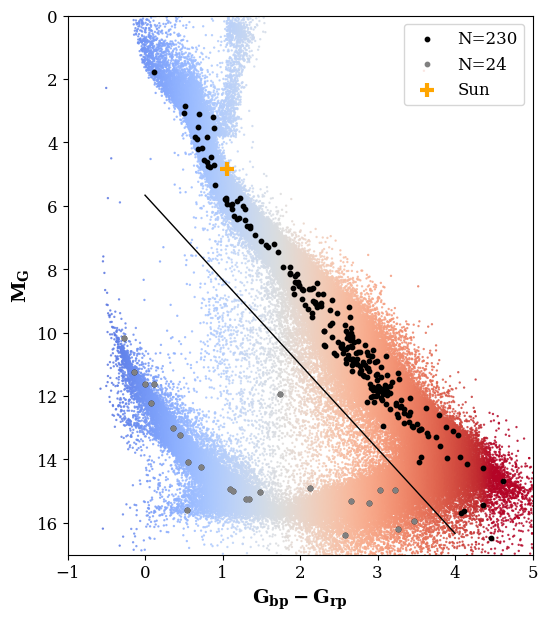

In [67]:
fig = plt.figure(figsize=(6,7))

plt.scatter(gcns_bp_rp, gcns['Gmag']-5*np.log10(gcns['Dist50pc'].values)+5,
            c=gcns_bp_rp, cmap='coolwarm', vmin=-1, vmax=4.5, s=0.5, alpha=0.8, rasterized=True)

all_plot = plt.scatter(ellipsoid_targets_all['bp_rp'].values, ellipsoid_targets_all['M_G'].values-5*np.log10(ellipsoid_targets_all['d(pc)'].values)+5, 
                       c='black', s=10, label='N='+str(len(ellipsoid_targets_all)-len(white_dwarfs)-len(ellipsoid_targets_all[ellipsoid_targets_all[('bp_rp',)].isna()])), rasterized=True)
plt.scatter(white_dwarfs['bp_rp'].values, white_dwarfs['M_G'].values-5*np.log10(white_dwarfs['d(pc)'].values)+5,
                       color='gray', label='N='+str(len(white_dwarfs)), s=10, rasterized=True)

plt.plot(x,y,linestyle='-', c = 'black', linewidth=1, alpha=1)

plt.scatter([5.48-4.42],[4.83], c='orange', marker='+', s=100, lw=3, label='Sun')
plt.xlabel('$\mathdefault{G_{bp}-G_{rp}}$',size=14, fontweight='bold', fontfamily='serif')
plt.ylabel('$\mathdefault{M_G}$',size=14, fontweight='bold')
plt.gca().invert_yaxis()
#plt.subplots_adjust(left=0.15)
plt.xlim(-1,5)
plt.ylim(17, 0)



plt.legend()

#plt.savefig('cmd.pdf',bbox_inches='tight')

In [68]:
y_data23 = 8/3*ellipsoid_targets_desired_columns23['bp_rp'].values + 17/3
y_data24 = 8/3*ellipsoid_targets_desired_columns24['bp_rp'].values + 17/3
white_dwarfs23 = ellipsoid_targets_desired_columns23[ellipsoid_targets_desired_columns23['M_G'].values-5*np.log10(ellipsoid_targets_desired_columns23['d(pc)'].values)+5 >= y_data23] 
white_dwarfs24 = ellipsoid_targets_desired_columns24[ellipsoid_targets_desired_columns24['M_G'].values-5*np.log10(ellipsoid_targets_desired_columns24['d(pc)'].values)+5 >= y_data24] 

In [70]:
len(white_dwarfs24)

14

In [71]:
len(white_dwarfs23)

10

In [72]:
ellipsoid_targets_desired_columns23['star'] = (ellipsoid_targets_desired_columns23['M_G'].values-5*np.log10(ellipsoid_targets_desired_columns23['d(pc)'].values)+5 <= y_data23).astype(int)
ellipsoid_targets_desired_columns24['star'] = (ellipsoid_targets_desired_columns24['M_G'].values-5*np.log10(ellipsoid_targets_desired_columns24['d(pc)'].values)+5 <= y_data24).astype(int)

In [73]:
sum((ellipsoid_targets_desired_columns23['M_G'].values-5*np.log10(ellipsoid_targets_desired_columns23['d(pc)'].values)+5 <= y_data23).astype(int))

array([97])

In [74]:
ellipsoid_targets_desired_columns23['source_id'] = ellipsoid_targets23['GaiaEDR3']
ellipsoid_targets_desired_columns24['source_id'] = ellipsoid_targets24['GaiaEDR3']

In [75]:
ellipsoid_targets_desired_columns24

Label,ra,dec,d(pc),bp_rp,M_G,crossMJD,star,source_id
172166,191.057829,51.758453,14.51,1.1188,6.7498,60472.025378,1,1568219729458240128
175523,194.859494,56.562524,23.36,2.4884,12.1272,60454.083949,1,1576903019458821248
175855,195.183115,56.366354,25.34,0.5183,4.8860,60468.486451,1,1576850723937017216
178595,198.242868,58.086105,30.78,0.1119,14.0682,60438.640013,0,1566603962760532736
179656,199.332720,57.650621,33.71,1.9673,11.0753,60407.009930,1,1566377291566765056
...,...,...,...,...,...,...,...,...
201454,222.973803,51.785251,32.53,2.8639,14.7429,60430.307385,1,1593596389107440128
201456,222.976661,51.784476,32.53,2.3270,12.9858,60430.481931,1,1593596767064562304
202942,224.564369,59.583743,25.75,1.7148,9.5255,60469.707392,1,1614477420588506240
203563,225.232957,45.427733,11.71,1.8727,8.4675,60428.681590,1,1586968533015434624


In [76]:
white_dwarf_rows23 = ellipsoid_targets_desired_columns23.loc[ellipsoid_targets_desired_columns23['star'].values == 0]
white_dwarf_rows24 = ellipsoid_targets_desired_columns24.loc[ellipsoid_targets_desired_columns24['star'].values == 0]

In [77]:
len(white_dwarf_rows24)

20

In [78]:
len(ellipsoid_targets_desired_columns24)

153

In [79]:
len(ellipsoid_targets_all)

261

In [80]:
len(white_dwarfs)

24

In [81]:
white_dwarf_rows23

Label,ra,dec,d(pc),bp_rp,M_G,crossMJD,star,source_id
187613,207.835000,54.961767,69.43,0.0030,15.8296,60128.925086,0,1561515526026874624
187705,207.920753,54.329888,70.79,0.0716,16.4621,60122.756602,0,1561389253988468224
190367,210.931073,52.113495,42.45,0.4518,16.3767,60120.914897,0,1512752769450543488
190587,211.161994,54.865951,82.69,1.7469,16.5313,60088.651719,0,1609405545248504192
190589,211.162551,52.723854,92.42,0.3634,17.8469,60126.347865,0,1512865022715710464
190883,211.505805,52.825153,63.15,2.5864,20.4012,60110.456872,0,1512892849808507520
191157,211.793184,55.158196,53.27,0.5385,19.2343,60093.156101,0,1609392862209121664
192264,212.968835,55.990891,47.69,3.4680,19.3218,60120.059893,0,1609807687330195584
192730,213.478973,54.537892,77.02,1.4890,19.4645,60115.614261,0,1609479792346820736
192772,213.519999,54.640450,62.03,1.1398,18.9645,60110.791569,0,1609492303587052160


In [82]:
y_data = 8/3*ellipsoid_targets_all['bp_rp'].values + 17/3
white_dwarfs = ellipsoid_targets_all[ellipsoid_targets_all['M_G'].values-5*np.log10(ellipsoid_targets_all['d(pc)'].values)+5 >= y_data] 

In [83]:
y_data23 = 8/3*ellipsoid_targets_desired_columns23['bp_rp'].values + 17/3
y_data24 = 8/3*ellipsoid_targets_desired_columns24['bp_rp'].values + 17/3
white_dwarfs23 = ellipsoid_targets_desired_columns23[ellipsoid_targets_desired_columns23['M_G'].values-5*np.log10(ellipsoid_targets_desired_columns23['d(pc)'].values)+5 >= y_data23] 
white_dwarfs24 = ellipsoid_targets_desired_columns24[ellipsoid_targets_desired_columns24['M_G'].values-5*np.log10(ellipsoid_targets_desired_columns24['d(pc)'].values)+5 >= y_data24] 

In [84]:
len(y_data23)-len(white_dwarf_rows23)+len(y_data24)-len(white_dwarf_rows24)

230

In [85]:
len(ellipsoid_targets_all[ellipsoid_targets_all[('bp_rp',)].isna()])


7

In [200]:
#ellipsoid_targets_desired_columns23.to_csv('SN2023ixf_60094.csv')
#ellipsoid_targets_desired_columns24.to_csv('SN2023ixf_60425.csv')

In [ ]:
targets_2024 = pd.read_csv("SN2023ixf_60425.csv")

In [77]:
targets_2024

,Unnamed: 0,ra,dec,d(pc),bp_rp,M_G,crossMJD,star,source_id
0,0,191.057829,51.758453,14.51,1.1188,6.7498,60472.02538,1,1568219729458240128
1,1,194.859494,56.562524,23.36,2.4884,12.1272,60454.08395,1,1576903019458821248
2,2,195.183115,56.366354,25.34,0.5183,4.8860,60468.48645,1,1576850723937017216
3,3,198.242868,58.086105,30.78,0.1119,14.0682,60438.64001,0,1566603962760532736
4,4,199.332720,57.650621,33.71,1.9673,11.0753,60407.00993,1,1566377291566765056
...,...,...,...,...,...,...,...,...,...
148,148,222.973803,51.785251,32.53,2.8639,14.7429,60430.30739,1,1593596389107440128
149,149,222.976661,51.784476,32.53,2.3270,12.9858,60430.48193,1,1593596767064562304
150,150,224.564369,59.583743,25.75,1.7148,9.5255,60469.70739,1,1614477420588506240
151,151,225.232957,45.427733,11.71,1.8727,8.4675,60428.68159,1,1586968533015434624


In [78]:
targets_2024[targets_2024['star']==0]

,Unnamed: 0,ra,dec,d(pc),bp_rp,M_G,crossMJD,star,source_id
3,3,198.242868,58.086105,30.78,0.1119,14.0682,60438.64001,0,1566603962760532736
10,10,200.849398,51.541090,44.16,NaN,15.9209,60438.86996,0,1562758730079480448
23,23,202.902711,54.184615,93.56,2.8869,20.2316,60455.17333,0,1561981341000088320
28,28,203.395008,49.205493,43.12,NaN,14.9487,60455.92759,0,1552599276998236544
33,33,204.006696,48.479323,36.86,-0.1373,14.0659,60434.26030,0,1552488776081383040
38,38,204.642808,51.916885,94.43,3.0347,19.8391,60424.02123,0,1559228365746156672
47,47,205.724536,50.028985,65.44,NaN,16.4615,60421.07841,0,1558499428191540352
58,58,207.528369,50.591330,107.95,1.0949,20.0888,60437.80321,0,1510915038844200064
65,65,209.490953,60.482233,49.88,0.7231,17.7261,60433.34087,0,1660937971614743808
68,68,209.733559,49.759681,100.99,2.6535,20.3456,60472.96004,0,1510586387945386240
